In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

print(df.shape)

print(df.info())
df.head()

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Описание данных:
PassengerId - Unique ID of the passenger

Pclass - Passenger's class (1st, 2nd, or 3rd)

Name - Passenger's name

Sex - Passenger's sex

Age - Passenger's age

SibSp - Number of siblings/spouses aboard the Titanic - кол-во братьев(сестер)/супругов на борту

Parch - Number of parents/children aboard the Titanic - кол-во родителей/детей

Ticket - Ticket number

Fare - Fare paid for ticket

Cabin - Cabin number

Embarked - Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

In [3]:
# определеяем количественные и категориальные признаки
cat_cols = df.columns[df.dtypes == 'object']
num_cols = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]

list(num_cols)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [4]:
cat_df = df[list(cat_cols)]
num_df = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

num_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A1627F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A4C9E80>]], dtype=object)

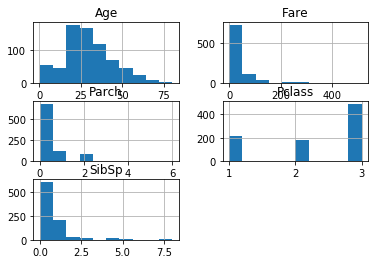

In [5]:
# распределение количесвтенных признаков
num_df.hist()

In [6]:
# проверяем наличие пустых значений
num_df.isnull().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [7]:
# смотрим, есть ли различия в среднем возрасте пассажиров в зависимости от пола и класса 
AgeGroup=df[['Age', 'Pclass','Sex']].groupby(['Sex','Pclass'], as_index=False).mean().sort_values(by=['Sex','Pclass'], ascending=True)
AgeGroup

,Sex,Pclass,Age
0,female,1,34.611765
1,female,2,28.722973
2,female,3,21.750000
3,male,1,41.281386
4,male,2,30.740707
5,male,3,26.507589


In [8]:
AgeGroup['sex&class']=AgeGroup['Sex'] + (AgeGroup['Pclass'].apply(str))
print(AgeGroup)

num_df['sex&class']=df['Sex'] + (num_df['Pclass'].apply(str))

      Sex  Pclass        Age sex&class
0  female       1  34.611765   female1
1  female       2  28.722973   female2
2  female       3  21.750000   female3
3    male       1  41.281386     male1
4    male       2  30.740707     male2
5    male       3  26.507589     male3


C:\Users\admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
num_df[num_df['Age'].isnull() == True].head(10)

,Pclass,Age,SibSp,Parch,Fare,sex&class
5,3,NaN,0,0,8.4583,male3
17,2,NaN,0,0,13.0000,male2
19,3,NaN,0,0,7.2250,female3
26,3,NaN,0,0,7.2250,male3
28,3,NaN,0,0,7.8792,female3
29,3,NaN,0,0,7.8958,male3
31,1,NaN,1,0,146.5208,female1
32,3,NaN,0,0,7.7500,female3
36,3,NaN,0,0,7.2292,male3
42,3,NaN,0,0,7.8958,male3


In [15]:
import math

i=0
while i < num_df.shape[0]:
    if math.isnan(num_df['Age'][i:i+1]) == True:
        a = num_df['sex&class'][i:i+1][i]
        num_df['Age'][i:i+1] = int(AgeGroup['Age'][AgeGroup['sex&class'] == a])
        i+=1
    else: i+=1

C:\Users\admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\admin\Anaconda2\lib\site-packages\pandas\core\series.py:767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
C:\Users\admin\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2878: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
num_df.head(20)

,Pclass,Age,SibSp,Parch,Fare,sex&class
0,3,22.0,1,0,7.2500,male3
1,1,38.0,1,0,71.2833,female1
2,3,26.0,0,0,7.9250,female3
3,1,35.0,1,0,53.1000,female1
4,3,35.0,0,0,8.0500,male3
5,3,26.0,0,0,8.4583,male3
6,1,54.0,0,0,51.8625,male1
7,3,2.0,3,1,21.0750,male3
8,3,27.0,0,2,11.1333,female3
9,2,14.0,1,0,30.0708,female2


In [29]:
# дополнительные признаки: суммарное кол-во членов семьи на борту, суммарное кол-во денег, потраченных на билеты
num_df['all_fam'] = num_df['SibSp'] + num_df['Parch']
num_df['income'] = num_df['all_fam'] * num_df['Fare']

C:\Users\admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
num_df = num_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'all_fam', 'income']]

Далее поработаем с категориальными признаками 

In [24]:
print(cat_df.nunique())

cat_df.head()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [26]:
cat_df.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

Исключаем из рассмотрения показатели: 
- Ticket (т.к. слишком много уникальных значений), 
- Сabin (т.к. слишком много уникальных/пропущенных значений)
- Name (т.к. слишком много уникальных значений, но попробуем вытянуть из имени статус пассажира)

In [34]:
cat_df['title'] = cat_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

cat_df['title'].value_counts()

C:\Users\admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Mr        531
Miss      185
Mrs       135
Master     40
Name: title, dtype: int64

чтобы уменьшить кол-во званий, определим для редких значений синонимичный титул:

Dr - в зависмости от пола

Rev - преподобный (от reverend)

Col - полковник (от colonel)

Major - майор

Mlle - с франц. miss

Countess - графиня -> mrs

Ms - miss

Lady - замужняя дама -> mrs

Jonkheer - юнкер -> mr

Don - mr

Mme - с франц. мадам  -> mrs

Capt - капитан -> mr

Sir - mr

In [35]:
# производим замену титулов для единообразия
def replace_titles(x):
    title=x['title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir']:
        return 'Mr'
    elif title in ['Countess', 'Mme', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
cat_df['title']=cat_df.apply(replace_titles, axis=1)

cat_df['title'].value_counts()

C:\Users\admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Mr        531
Miss      185
Mrs       135
Master     40
Name: title, dtype: int64

In [36]:
cat_df = cat_df[['Sex', 'Embarked', 'title']]
cat_with_dummies = pd.get_dummies(cat_df, columns=['Sex', 'Embarked', 'title'])
cat_with_dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs
0,0,1,0,0,1,0,0,1,0
1,1,0,1,0,0,0,0,0,1
2,1,0,0,0,1,0,1,0,0
3,1,0,0,0,1,0,0,0,1
4,0,1,0,0,1,0,0,1,0


In [42]:
df_train = pd.concat([num_df, cat_with_dummies], axis = 1)
print(df_train.shape)
print(df_train.head())

y = df['Survived']
print(y.shape)

(891, 16)
   Pclass   Age  SibSp  Parch     Fare  all_fam   income  Sex_female  \
0       3  22.0      1      0   7.2500        1   7.2500           0   
1       1  38.0      1      0  71.2833        1  71.2833           1   
2       3  26.0      0      0   7.9250        0   0.0000           1   
3       1  35.0      1      0  53.1000        1  53.1000           1   
4       3  35.0      0      0   8.0500        0   0.0000           0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  title_Master  title_Miss  \
0         1           0           0           1             0           0   
1         0           1           0           0             0           0   
2         0           0           0           1             0           1   
3         0           0           0           1             0           0   
4         1           0           0           1             0           0   

   title_Mr  title_Mrs  
0         1          0  
1         0          1  
2         0        

In [37]:
list(num_df)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex&class', 'all_fam', 'income']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)

(623, 16)
(268, 16)


In [60]:
# переходим к построению моделей
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)
accuracy_score(y_test, pred)

0.83955223880597019

In [61]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

pred = clf_tree.predict(X_test)
accuracy_score(y_test, pred)

0.7425373134328358

In [62]:
rnd_frst = RandomForestClassifier()
rnd_frst.fit(X_train, y_train)

pred = rnd_frst.predict(X_test)
accuracy_score(y_test, pred)

0.80597014925373134

##### Вывод
наибольший показатель качества у логистической регрессии, ее и применим для тестового (без разметки) датасета

In [78]:
test = pd.read_csv('test.csv')

cat_df = test[list(cat_cols)]
num_df = test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]


AgeGroup=test[['Age', 'Pclass','Sex']].groupby(['Sex','Pclass'], as_index=False).mean().sort_values(by=['Sex','Pclass'], ascending=True)
AgeGroup

AgeGroup['sex&class']=AgeGroup['Sex'] + (AgeGroup['Pclass'].apply(str))
print(AgeGroup)

num_df['sex&class']=test['Sex'] + (num_df['Pclass'].apply(str))

i=0
while i < num_df.shape[0]:
    if math.isnan(num_df['Age'][i:i+1]) == True:
        a = num_df['sex&class'][i:i+1][i]
        num_df['Age'][i:i+1] = int(AgeGroup['Age'][AgeGroup['sex&class'] == a])
        i+=1
    else: i+=1
        
num_df['all_fam'] = num_df['SibSp'] + num_df['Parch']
num_df['income'] = num_df['all_fam'] * num_df['Fare']
num_df = num_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'all_fam', 'income']]

cat_df['title'] = cat_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


def replace_titles(x):
    title=x['title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir']:
        return 'Mr'
    elif title in ['Countess', 'Mme', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
cat_df['title']=cat_df.apply(replace_titles, axis=1)

cat_df['title'].value_counts()


cat_df = cat_df[['Sex', 'Embarked', 'title']]
cat_with_dummies = pd.get_dummies(cat_df, columns=['Sex', 'Embarked', 'title'])
cat_with_dummies.head()

      Sex  Pclass        Age sex&class
0  female       1  41.333333   female1
1  female       2  24.376552   female2
2  female       3  23.073400   female3
3    male       1  40.520000     male1
4    male       2  30.940678     male2
5    male       3  24.525104     male3


C:\Users\admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\admin\Anac

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs
0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,1,0,0,0,1
2,0,1,0,1,0,0,0,1,0
3,0,1,0,0,1,0,0,1,0
4,1,0,0,0,1,0,0,0,1


In [79]:
df_test = pd.concat([num_df, cat_with_dummies], axis = 1)
print(df_test.shape)
print(df_test.head())

(418, 16)
   Pclass   Age  SibSp  Parch     Fare  all_fam  income  Sex_female  Sex_male  \
0       3  34.5      0      0   7.8292        0   0.000           0         1   
1       3  47.0      1      0   7.0000        1   7.000           1         0   
2       2  62.0      0      0   9.6875        0   0.000           0         1   
3       3  27.0      0      0   8.6625        0   0.000           0         1   
4       3  22.0      1      1  12.2875        2  24.575           1         0   

   Embarked_C  Embarked_Q  Embarked_S  title_Master  title_Miss  title_Mr  \
0           0           1           0             0           0         1   
1           0           0           1             0           0         0   
2           0           1           0             0           0         1   
3           0           0           1             0           0         1   
4           0           0           1             0           0         0   

   title_Mrs  
0          0  
1         

In [85]:
df_test = df_test.fillna(0)
pred = pd.DataFrame(logreg.predict(df_test), columns=['Survived'])
pred

,Survived
0,0
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [86]:
to_check = pd.concat([test['PassengerId'], pred], axis = 1)

In [90]:
to_check.to_csv('result.csv', index=False)